# BigMart Sales

In [1312]:
# Mounting Google Drive in Colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1. **Problem Statement**

**Project Description**:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

**Business Goal**: Build a predictive model to analyze 2013 sales data, identifying key product and store attributes that significantly impact sales, to enhance BigMart's understanding and boost sales.

# 2. **Hypothesis Generation**

**Store Location Affects Sales**: The geographic location of a store significantly influences product sales.

**Product Promotion Boosts Sales**: Actively promoted products experience increased sales compared to non-promoted ones.

**Store Size Drives Sales**: Larger stores with a diverse product assortment attract more customers and generate higher sales.

**Seasonal Variations Impact Sales**: Certain product categories show variations in sales based on seasonal trends.

**Price Sensitivity Influences Sales**: Changes in product prices have a direct impact on customer purchasing behavior and overall sales.

# 3. **Loading Packages and Data**

In [1313]:
# Data Manipulation and Visualization
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score

import pickle

In [1314]:
train = pd.read_csv('/content/gdrive/MyDrive/Internship/Technocolabs Softwares/Mini Project/Train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Internship/Technocolabs Softwares/Mini Project/Test.csv')

# 4. **Data Structure and Content**

The train set consists of 8,523 rows and 12 columns. The following table displays the data:

In [1315]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [1316]:
train.shape

(8523, 12)

In [1317]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [1318]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [1319]:
# For the test set
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [1320]:
test.shape

(5681, 11)

# 5. **Data Preprocessing**

We need to validate the data type and then clean the data.

##Data Validation

The 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type' and 'Outlet_Type' columns were converted to the 'categorical' data type:

In [1321]:
train[['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']] = \
    train[['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].astype('category')
test[['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']] = \
    test[['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].astype('category')

In the 'Item_Fat_Content' column, there were no matches in the input data. I corrected and converted it to a categorical type, as it only has two possible values:

In [1322]:
# Fixing the data type of the Item_Fat_Content column
print(train['Item_Fat_Content'].value_counts())
train['Item_Fat_Content'] = train['Item_Fat_Content'].str.replace('LF|low fat', 'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].str.replace('reg', 'Regular')
train['Item_Fat_Content'] = train['Item_Fat_Content'].astype('category')
print(train['Item_Fat_Content'].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


<ipython-input-1322-cd24aa73be62>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train['Item_Fat_Content'] = train['Item_Fat_Content'].str.replace('LF|low fat', 'Low Fat')


In [1323]:
# For the test set
test['Item_Fat_Content'] = test['Item_Fat_Content'].str.replace('LF|low fat', 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].str.replace('reg', 'Regular')
test['Item_Fat_Content'] = test['Item_Fat_Content'].astype('category')

<ipython-input-1323-b5710f28ef37>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['Item_Fat_Content'] = test['Item_Fat_Content'].str.replace('LF|low fat', 'Low Fat')


In [1324]:
print(train['Item_Weight'].value_counts())
print(train['Item_Visibility'].value_counts())
print(train['Item_MRP'].value_counts())
print(train['Outlet_Establishment_Year'].value_counts())
print(train['Item_Outlet_Sales'].value_counts())

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64
1985    1463
1987     932
1997     930
1999     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64
958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int6

In [1325]:
print(train['Item_Identifier'].value_counts())
print(train['Item_Fat_Content'].value_counts())
print(train['Item_Type'].value_counts())
print(train['Outlet_Identifier'].value_counts())
print(train['Outlet_Size'].value_counts())
print(train['Outlet_Location_Type'].value_counts())
print(train['Outlet_Type'].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    2793
Small     2388
High       932
Name: Outlet_Siz

##Data Cleaning

There are no duplicate rows

In [1326]:
# Drop duplicates
train.drop_duplicates(inplace= True)
train.shape

(8523, 12)

We handled outliers using the IQR method and visualized the data distribution for numerical values. It's important to note that there are no outliers in categorical values. We must refrain from altering the values of the target column to avoid compromising the integrity of the data.
Outliers, which represent rare deviations from typical data points, are shown in the graph outside the box:

In [1327]:
train_bef =train.copy()
# Handling Outliers
def handle_outlier(df,col):
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

train_num = train.select_dtypes(include="float64").drop(['Item_Outlet_Sales'], axis=1)
print(train_num)
for column in train_num.columns:
    handle_outlier(train, column)

      Item_Weight  Item_Visibility  Item_MRP
0           9.300         0.016047  249.8092
1           5.920         0.019278   48.2692
2          17.500         0.016760  141.6180
3          19.200         0.000000  182.0950
4           8.930         0.000000   53.8614
...           ...              ...       ...
8518        6.865         0.056783  214.5218
8519        8.380         0.046982  108.1570
8520       10.600         0.035186   85.1224
8521        7.210         0.145221  103.1332
8522       14.800         0.044878   75.4670

[8523 rows x 3 columns]


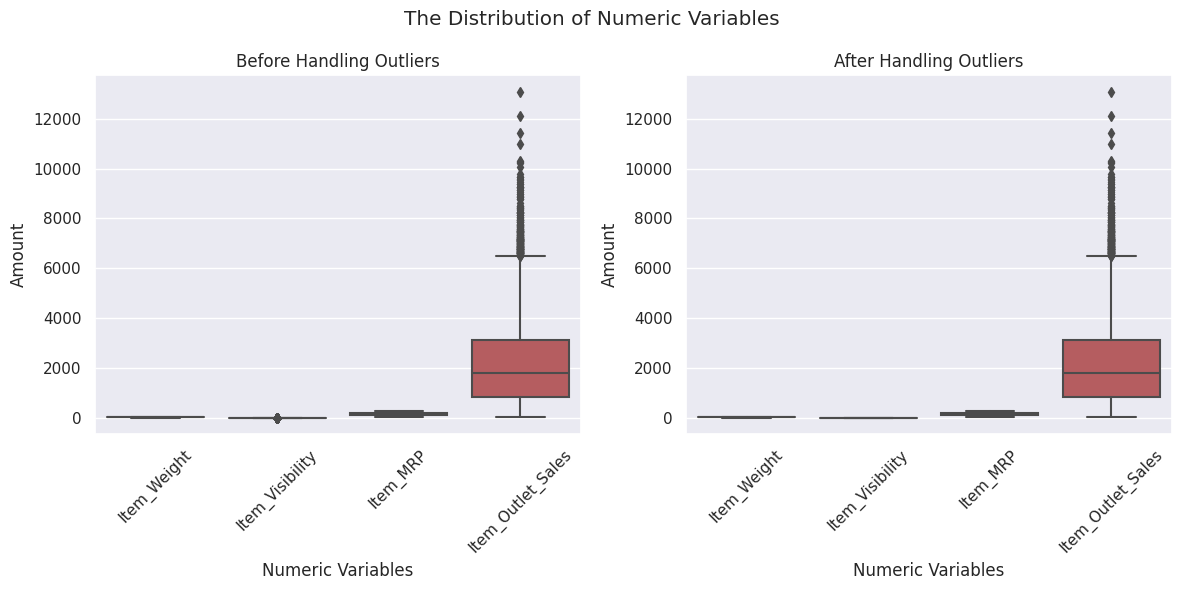

In [1328]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(train_bef,ax=axes[0])
sns.boxplot(train,ax=axes[1])
axes[0].set_title("Before Handling Outliers")
axes[1].set_title("After Handling Outliers")
fig.suptitle("The Distribution of Numeric Variables")
axes[0].set_xlabel("Numeric Variables")
axes[1].set_xlabel("Numeric Variables")
axes[0].set_ylabel("Amount")
axes[1].set_ylabel("Amount")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [1329]:
# Handling missing values
missing_values_count_train = train.isna().sum().sort_values()
missing_values_count_test = test.isna().sum().sort_values()
print("Missing values in the train set:\n",missing_values_count_train)
print("Missing values in the test set:\n",missing_values_count_test)

Missing values in the train set:
 Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight                  1463
Outlet_Size                  2410
dtype: int64
Missing values in the test set:
 Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight                   976
Outlet_Size                  1606
dtype: int64


We have two columns that contain missing values: 'Item_Weight' and 'Outlet_Size'. To provide a better idea of the extent of this issue, we will calculate the percentage of missing values in the dataset.

In [1330]:
# how many total missing values do we have?
total_cells = np.product(train.shape)
total_missing = missing_values_count_train.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

3.786812155344362


In [1331]:
# For the test set
# how many total missing values do we have?
total_cells = np.product(test.shape)
total_missing = missing_values_count_test.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

4.131794978476901


We could drop the rows with missing values, as they represent only 4% of the data. However, in our case, we will choose to fill in the missing values.

We will replace missing values in the **Item_Weight** column with the **mean** value. As for the **Outlet_Size** column, which is categorical, we will fill in the missing values using the **mode** (the most frequent category).

In [1332]:
train_orig = train.copy()
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [1333]:
# For the test set
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

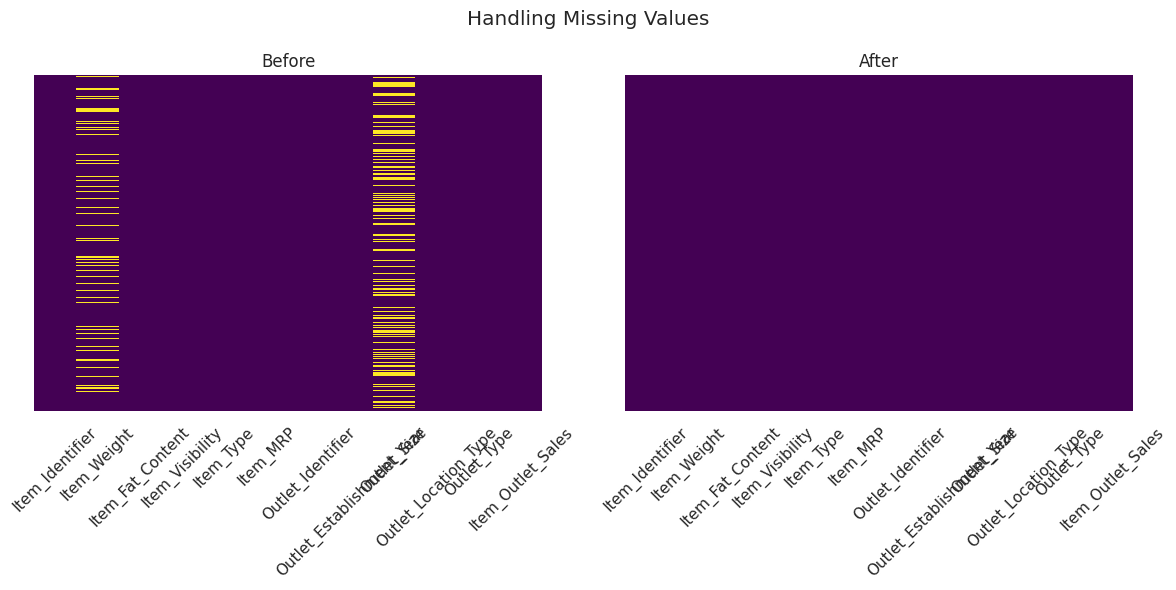

In [1334]:
# To check Missing Values
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(train_orig.isnull(), cbar=False, yticklabels=False, cmap="viridis",ax=axes[0])
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap="viridis", ax=axes[1])
axes[0].set_title("Before")
axes[1].set_title("After")
fig.suptitle("Handling Missing Values")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
plt.tight_layout()

# 6. **Exploratory Data Analysis**

After processing, we now have clean data ready for exploration and analysis

###Target Variable - Item_Outlet_Sales

Since we aim to predict the sales of each product, the 'Item_Outlet_Sales' variable will be our **target variable**. The chart below displays the distribution of Item_Outlet_Sales. It's evident that the plot shows a right-skewed distribution.

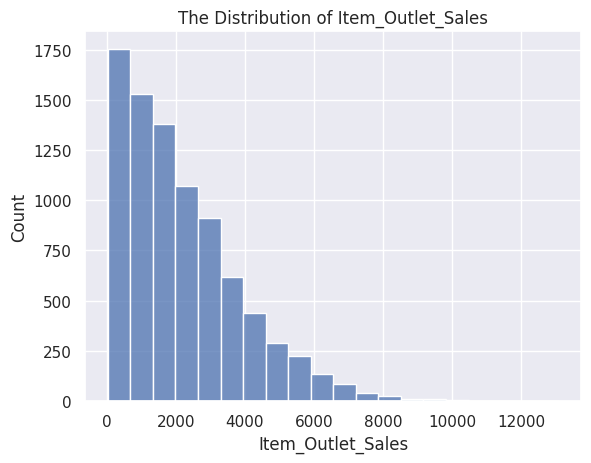

In [1335]:
sns.histplot(train['Item_Outlet_Sales'], kde=False, bins=20)
plt.title('The Distribution of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Count')
plt.show()

###Numeric Variables - Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales

Based on the heatmap below, we can conclude that there is a strong linear positive relationship between 'Item_Outlet_Sales' and 'Item_MRP', as well as a weak linear positive relationship between 'Item_Outlet_Sales' and 'Item_Visibility

Text(0.5, 1.0, 'The Correlation Heatmap between Numeric Variables')

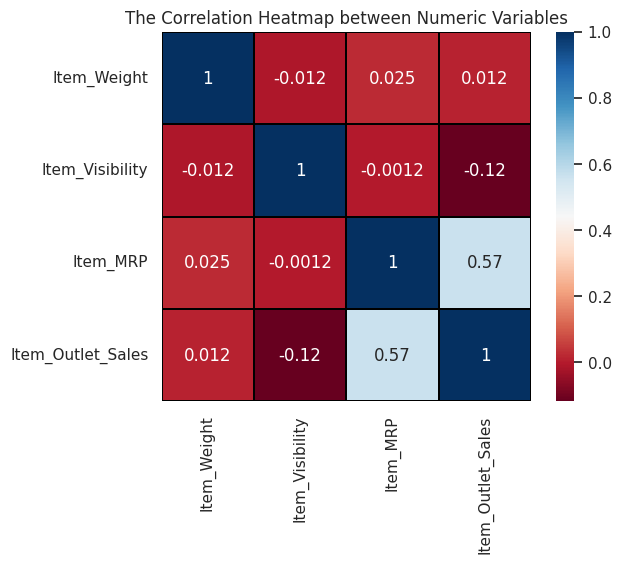

In [1336]:
numeric_columns = train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']]
heat=sns.heatmap(numeric_columns.corr(), annot=True, linewidth=0.01, square=True, cmap="RdBu", linecolor="black")
heat.set_title("The Correlation Heatmap between Numeric Variables")

**Relationship between Item_Weight, Item_Visibility, Item_MRP and Item_Outlet_Sales**

To spot the non-linear relationship, I decided to make scatterplot to further investigate the relationship between Item_Weight, Item_Visibility, Item_MRP and our target varible - Item_Outlet_Sales. From the scatterplots below, there is weak linear relationship between Item_Weight and Item_Outlet_Sales. No relationship between Item_Outlet_Sales and Item_Visibility. I found out there is clusters in the scatterplot between Item_Outlet_Sales and Item_MRP, so I decided to create a new ordinal variable from the Item_MRP variable.

Text(0.5, 1.0, 'Item_MRP vs Item_Outlet_Sales')

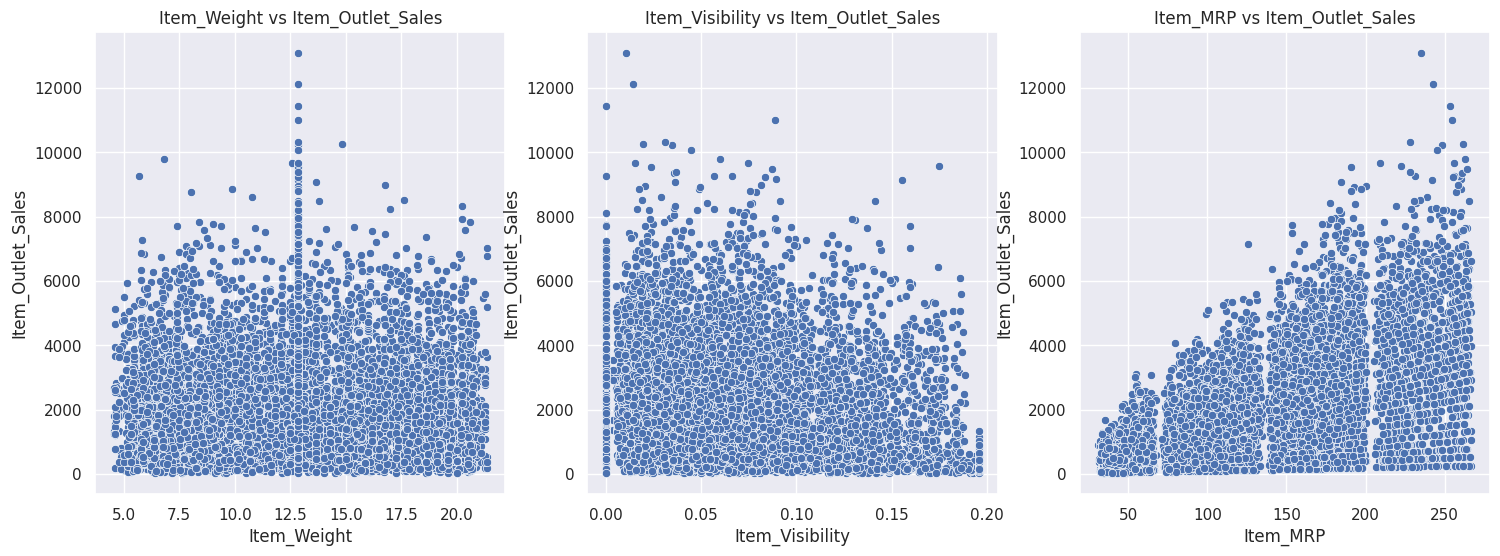

In [1337]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=train, ax=axes[0])
axes[0].set_title('Item_Weight vs Item_Outlet_Sales')

sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train, ax=axes[1])
axes[1].set_title('Item_Visibility vs Item_Outlet_Sales')

sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train, ax=axes[2])
axes[2].set_title('Item_MRP vs Item_Outlet_Sales')

<Axes: xlabel='Item_MRP', ylabel='count'>

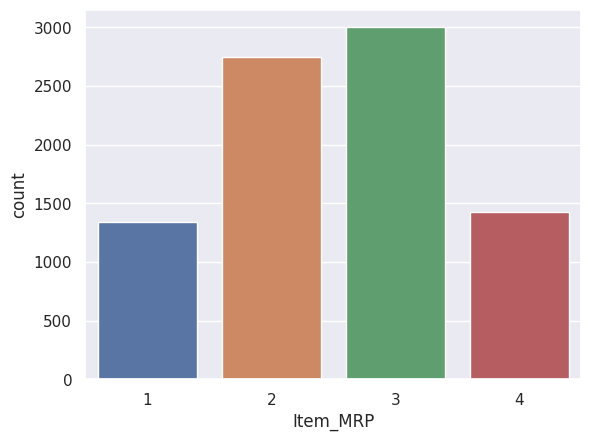

In [1338]:
bins = [0, 70, 135.5, 203, 270]
labels = [1, 2, 3, 4]
train['Item_MRP'] = pd.cut(train['Item_MRP'], bins=bins, labels=labels, include_lowest=True)
test['Item_MRP'] = pd.cut(test['Item_MRP'], bins=bins, labels=labels, include_lowest=True)
sns.countplot(x='Item_MRP', data=train)

###Categorical Variables - Item_Fat_Content, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type

From the bar charts below, we can observe the most frequent categories in the categorical columns of the dataset.

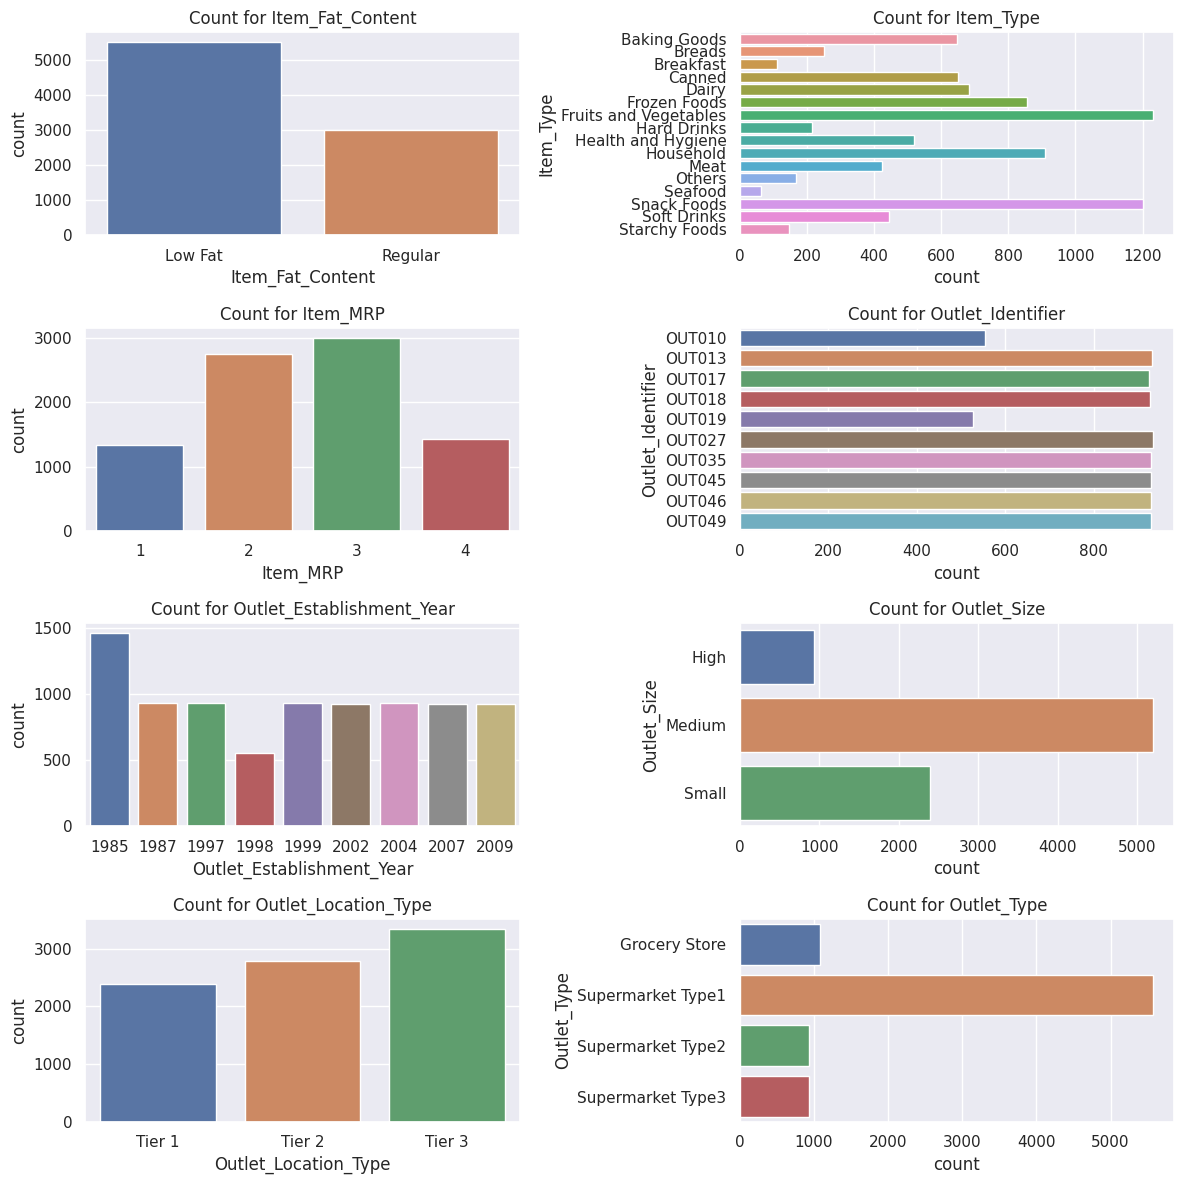

In [1339]:
cat_columns = train.select_dtypes(include=["category"])

plt.figure(figsize=(12, 12))

for i, col in enumerate(cat_columns, 1):
    plt.subplot(4, 2, i)
    if i%2 != 0:
      sns.countplot(x=col, data=train)
    else:
      sns.countplot(y=col, data=train)
    plt.title(f'Count for {col}')

plt.tight_layout()

**Relationship between categories variables and Item_Outlet_Sales**

I also investigated their relationship between Item_Outlet_Sales. From the boxplots below, we can see there is a difference in distribution of Item_Outlet_Sales among each categories in each variable.

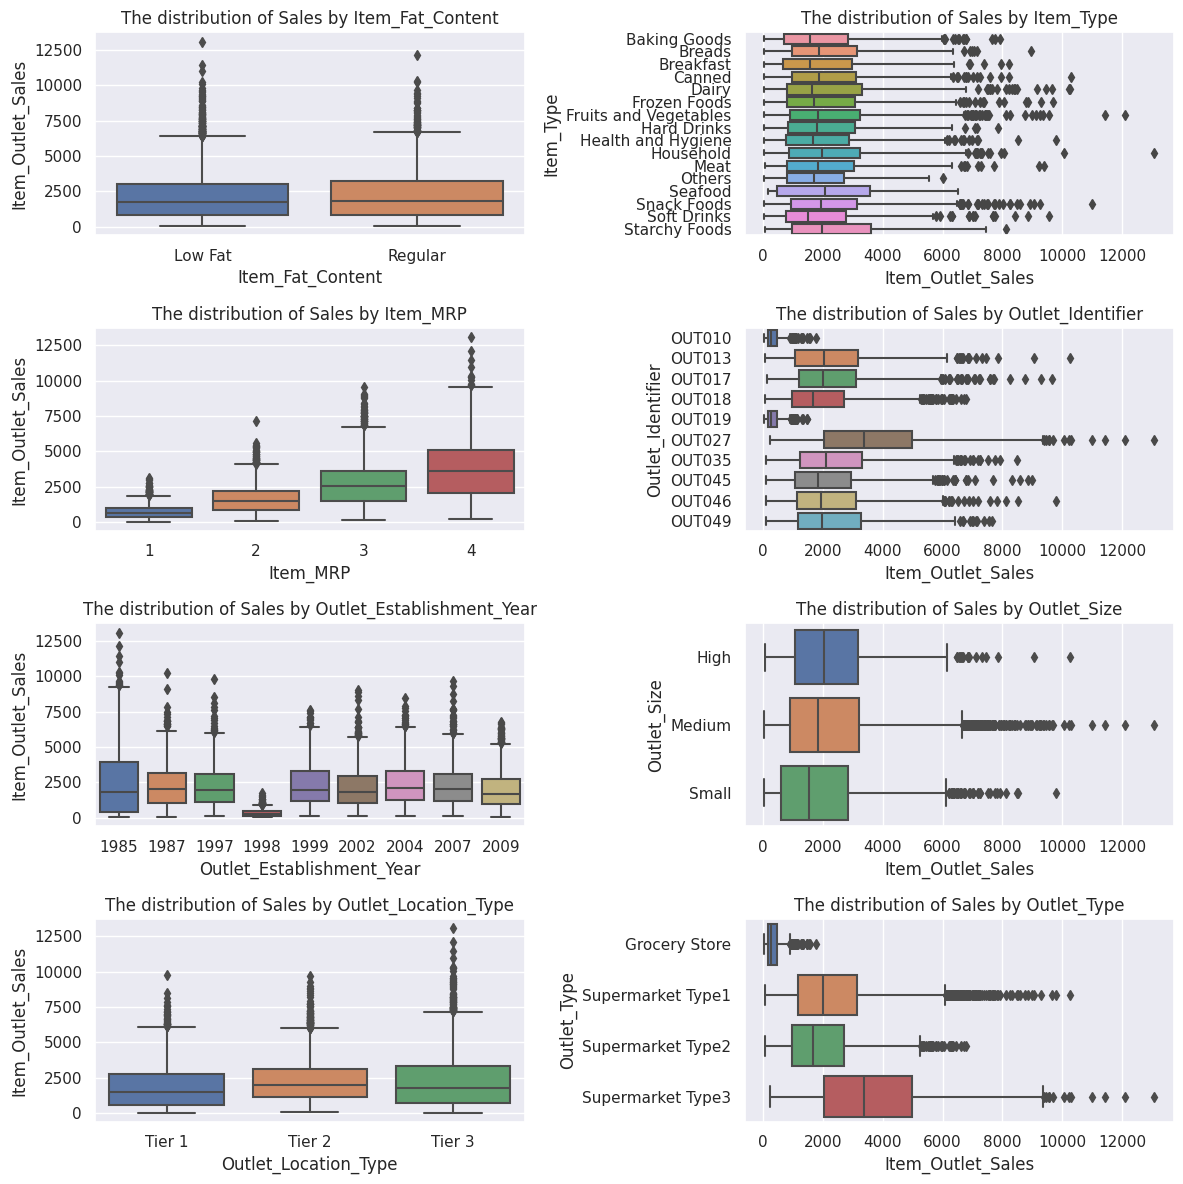

In [1340]:
plt.figure(figsize=(12, 12))

for i, col in enumerate(cat_columns, 1):
    plt.subplot(4, 2, i)
    if i%2 != 0:
      sns.boxplot(x=col, y='Item_Outlet_Sales', data=train)
    else:
      sns.boxplot(y=col, x='Item_Outlet_Sales', data=train)
    plt.title(f'The distribution of Sales by {col}')

plt.tight_layout()

# 7. **Data Preparation for Modeling**

In [1341]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

This is the data after preprocessing:

In [1342]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,4,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,1,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,3,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,3,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,1,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,1,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,1,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,2,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,2,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,3,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [1343]:
print(train.dtypes)
train.shape

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                     category
Outlet_Identifier            category
Outlet_Establishment_Year    category
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object


(8523, 12)

In [1344]:
# Drop id column
train.drop(labels=['Item_Identifier'], axis=1, inplace=True)

To enable modelling, I have made the following changes:

*   Encoding categorical features
*   Scaling the numeric features
*   Split the data into a training set and a test set






**Encoding categorical variables**

Categorical features are classified into two categories: ordinal and nominal. We apply Label Encoding to ordinal features and One-Hot Encoding to nominal features.

In [1345]:
# Encoding ordinal features

train['Outlet_Size'] = train['Outlet_Size'].map({'Small'  : 1,
                                                 'Medium' : 2,
                                                 'High'   : 3
                                                 }).astype(int)
train['Outlet_Establishment_Year'] = train['Outlet_Establishment_Year'].astype('int')
train['Item_MRP'] = train['Item_MRP'].astype('int')
label_encoder = LabelEncoder()
train['Item_Fat_Content'] = label_encoder.fit_transform(train['Item_Fat_Content'])


test['Outlet_Size'] = test['Outlet_Size'].map({'Small'  : 1,
                                               'Medium' : 2,
                                               'High'   : 3
                                              }).astype(int)
test['Outlet_Establishment_Year'] = test['Outlet_Establishment_Year'].astype('int')
train['Item_MRP'] = train['Item_MRP'].astype('int')
label_encoder = LabelEncoder()
test['Item_Fat_Content'] = label_encoder.fit_transform(test['Item_Fat_Content'])

In [1346]:
# Encoding nominal features

train = pd.get_dummies(train, columns=['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)
test  = pd.get_dummies(test,  columns=['Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)

In [1347]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,4,1999,2,3735.1380,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,5.92,1,0.019278,1,2009,2,443.4228,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,17.50,0,0.016760,3,1999,2,2097.2700,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,19.20,1,0.000000,3,1998,2,732.3800,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,1,1987,3,994.7052,0,0,0,...,0,0,0,0,0,0,1,1,0,0


**Splitting Data & Scaling the numeric features**

We scaled the numerical columns, excluding the target column to prevent any leakage, and partitioned the data into 80% for training and 20% for testing.

In [1348]:
# Define X variables and our target(y)

X = train.drop(["Item_Outlet_Sales"],axis=1).values
y = train["Item_Outlet_Sales"].values

print("X : ",X.shape," y : ",y.shape)

X :  (8523, 35)  y :  (8523,)


In [1349]:
numeric_features = X[:, [0, 2]]

# Standardization
st_scaler = StandardScaler()
st_scaler.fit(numeric_features)
numeric_features_scaler = st_scaler.transform(numeric_features)
X_scaler = np.concatenate((numeric_features_scaler, X[:, [i for i in range(X.shape[1]) if i not in [0, 2]]]), axis=1)

There will be two versions of the data: one **with scaling** and the other **without scaling**

In [1350]:
# With scaling
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaler,
              y, test_size= 0.20, random_state=42)


# Without scaling
X_train, X_test, y_train, y_test = train_test_split(X,
              y, test_size= 0.20, random_state=42)

print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test = ", y_test.shape)

X_train =  (6818, 35)  y_train =  (6818,)
X_test  =  (1705, 35)  y_test =  (1705,)


# 8. **Modeling**

Predicting item outlet sales is a **regression problem**, as it involves forecasting continuous values. The models we use include **Linear Regression** (LR), **Regularized Linear Regression** (RLR), **Random Forest Regressor** (RFR), and **XGBoost Regressor** (XGBR). For RLR we will use LassoCV.

We will use LR and RLR models with scaled data. On the other hand, RFR and XGBR models will be employed with data without scaling, as they are not sensitive to the scale of the features.

### Linear Regression

In [1351]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [1352]:
# Predictions
lr_predictions = lr.predict(X_test_scaled)

In [1353]:
# Evaluation

# Training Score
lr_training_score = lr.score(X_train_scaled, y_train_scaled)

# Test Score
lr_test_score = lr.score(X_test_scaled, y_test_scaled)

# Mean Squared Error (MSE)
lr_mse = mean_squared_error(y_test_scaled, lr_predictions)

# R-squared (R2) Score
lr_r2 = r2_score(y_test_scaled, lr_predictions)

In [1354]:
print(f'Training Score: {lr_training_score}')
print(f'Test Score: {lr_test_score}')
print(f'Mean Squared Error (MSE): {lr_mse}')
print(f'R-squared (R2) Score: {lr_r2}')

Training Score: 0.53810422951357
Test Score: 0.5612394074557018
Mean Squared Error (MSE): 1192538.1569464188
R-squared (R2) Score: 0.5612394074557018


### Regularized Linear Regression

In [1355]:
lasso = LassoCV(cv=5)
lasso.fit(X_train_scaled, y_train_scaled)

LassoCV(cv=5)

In [1356]:
# Predictions
lasso_predictions = lasso.predict(X_test_scaled)

In [1357]:
# Evaluation

# Training Score
lasso_training_score = lasso.score(X_train_scaled, y_train_scaled)

# Test Score
lasso_test_score = lasso.score(X_test_scaled, y_test_scaled)

# Mean Squared Error (MSE)
lasso_mse = mean_squared_error(y_test_scaled, lasso_predictions)

# R-squared (R2) Score
lasso_r2 = r2_score(y_test_scaled, lasso_predictions)

In [1358]:
print(f'Training Score: {lasso_training_score}')
print(f'Test Score: {lasso_test_score}')
print(f'Mean Squared Error (MSE): {lasso_mse}')
print(f'R-squared (R2) Score: {lasso_r2}')

Training Score: 0.5375267016805338
Test Score: 0.5636058682129167
Mean Squared Error (MSE): 1186106.1874444855
R-squared (R2) Score: 0.5636058682129167


### Random Forest

In [1359]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [1360]:
# Predictions
rf_predictions = rf.predict(X_test)

In [1361]:
# Evaluation

# Training Score
rf_training_score = rf.score(X_train, y_train)

# Test Score
rf_test_score = rf.score(X_test, y_test)

# Mean Squared Error (MSE)
rf_mse = mean_squared_error(y_test, rf_predictions)

# R-squared (R2) Score
rf_r2 = r2_score(y_test, rf_predictions)

In [1362]:
print(f'Training Score: {rf_training_score}')
print(f'Test Score: {rf_test_score}')
print(f'Mean Squared Error (MSE): {rf_mse}')
print(f'R-squared (R2) Score: {rf_r2}')

Training Score: 0.9307139399823592
Test Score: 0.5218020560219396
Mean Squared Error (MSE): 1299727.6976500284
R-squared (R2) Score: 0.5218020560219396


### XGBoost Regressor

In [1363]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [1364]:
# Predictions
xgb_predictions = xgb.predict(X_test)

In [1365]:
# Evaluation

# Training Score
xgb_training_score = xgb.score(X_train, y_train)

# Test Score
xgb_test_score = xgb.score(X_test, y_test)

# Mean Squared Error (MSE)
xgb_mse = mean_squared_error(y_test, xgb_predictions)

# R-squared (R2) Score
xgb_r2 = r2_score(y_test, xgb_predictions)

In [1366]:
print(f'Training Score: {xgb_training_score}')
print(f'Test Score: {xgb_test_score}')
print(f'Mean Squared Error (MSE): {xgb_mse}')
print(f'R-squared (R2) Score: {xgb_r2}')

Training Score: 0.82568516452803
Test Score: 0.5299106526581276
Mean Squared Error (MSE): 1277688.7747106005
R-squared (R2) Score: 0.5299106526581276


# 9. **Results and Discussion**

We can see that Regularized Linear Regression has the best score without overfitting. That means the Regularized Linear Regression model fits the features better and has less error in predicting values.

In [1367]:
Train = [lr_training_score, lasso_training_score, rf_training_score, xgb_training_score]
Test = [lr_test_score, lasso_test_score, rf_test_score, xgb_test_score]
MSE= [lr_mse, lasso_mse, rf_mse, xgb_mse]
R_2= [lr_r2, lasso_r2, rf_r2, xgb_r2]

Models = pd.DataFrame({
    'models': ["Linear Regression"," Regularized Linear Regression","Random Forest Regressor", "XGBoost Regressor "],
    'Training Score': Train, 'Test Score': Test, 'MSE':MSE, 'R2 Score':R_2})
Models.sort_values(by='MSE')

,models,Training Score,Test Score,MSE,R2 Score
1,Regularized Linear Regression,0.537527,0.563606,1.186106e+06,0.563606
0,Linear Regression,0.538104,0.561239,1.192538e+06,0.561239
3,XGBoost Regressor,0.825685,0.529911,1.277689e+06,0.529911
2,Random Forest Regressor,0.930714,0.521802,1.299728e+06,0.521802


Outlet_Identifier_OUT049             29.913651
Item_Visibility                      38.163482
Outlet_Size                          43.040608
Item_Type_Fruits and Vegetables      59.018002
Outlet_Identifier_OUT035             98.710319
Item_MRP                            991.111542
Outlet_Type_Supermarket Type2      1460.144569
Outlet_Type_Supermarket Type3      1527.453982
Outlet_Identifier_OUT027           1733.144413
Outlet_Type_Supermarket Type1      1826.629855
dtype: float64


Text(0.5, 1.0, 'Feature Importance in Regularized Linear Regression Model')

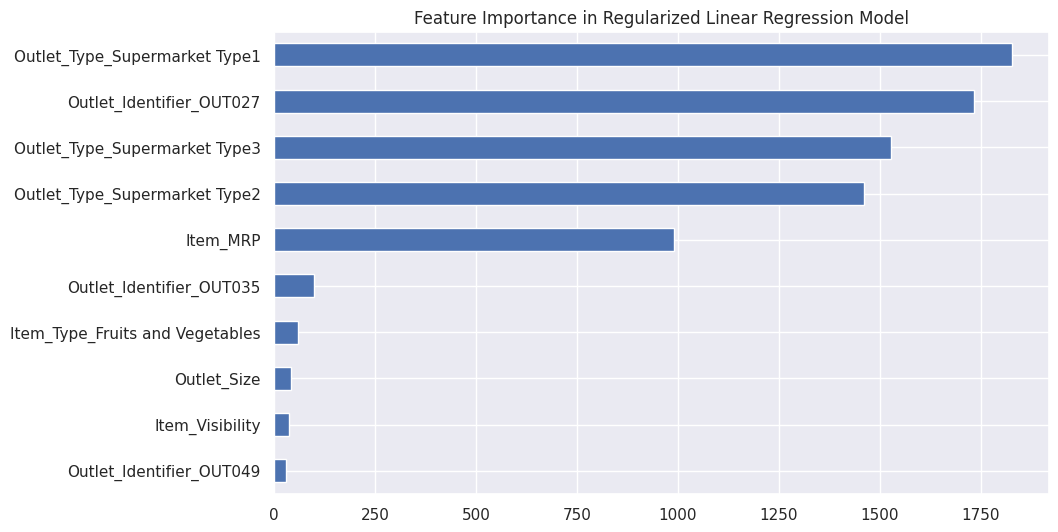

In [1368]:
# Feature Importance
column_names = train.drop(["Item_Outlet_Sales"],axis=1).columns.tolist()
importances = pd.Series(lasso.coef_, index=column_names)
sorted_importances = importances.sort_values()
top10_importances = sorted_importances[-10:]
plt.figure(figsize=(10, 6))
top10_importances.plot(kind='barh')
print(top10_importances)
plt.title('Feature Importance in Regularized Linear Regression Model')

###Recommendations

To assist BigMart in understanding the properties of products and stores that significantly contribute to increased sales, I recommend employing the Random Forest Model.

To implement and enhance the model, the following steps should be considered:

**Key Features**: Item_MRP, Outlet_Type_Supermarket Type2, Outlet_Type_Supermarket Type3, Outlet_Identifier_OUT027, and Outlet_Type_Supermarket Type1 have been identified as key contributors to increased sales. It is advisable to focus more on supermarkets, particularly those with Identifier OUT027.

**Regular Model Retraining**: Implement a regular retraining schedule to keep the model updated with the latest data.

**Data Collection**: Consider collecting more data to improve the model's performance, for example, by gathering additional information on certain features.

**Deployment Strategy**: Explore optimal deployment strategies for the machine learning model in terms of both performance and cost-effectiveness. Consider deploying it on edge devices for convenience and security.

# 9. **Final Predictions and Saving the Model**

###Final Predictions

In [1369]:
test_id = test['Item_Identifier']
test.drop(labels=['Item_Identifier'], axis=1, inplace=True)

# Standardization
test = test.values
numeric_features = test[:, [0, 2]]
st_scaler = StandardScaler()
st_scaler.fit(numeric_features)
numeric_features_scaler = st_scaler.transform(numeric_features)
test_scaler = np.concatenate((numeric_features_scaler, test[:, [i for i in range(test.shape[1]) if i not in [0, 2]]]), axis=1)

# Create a Model from the Complete Training Data
lasso = LassoCV(cv=5)
lasso.fit(X_scaler, y)
final_predictions = lasso.predict(test_scaler)

In [1370]:
submission_df = pd.DataFrame({
    'Item_Identifier': test_id,
    'Predicted': final_predictions
})
submission_df.set_index('Item_Identifier', inplace=True)
print(submission_df.head())

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

                   Predicted
Item_Identifier             
FDW58            1806.717912
FDW14            1859.590094
NCN55            1884.479751
FDQ58            2813.726495
FDY38            5138.965343


###Saving the Model

In [1371]:
with open("BigMart_Sales_Model.pkl", "wb") as file:
    pickle.dump(lasso, file)